<a href="https://colab.research.google.com/github/liz-robson/data-analysis-with-python/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import calendar

In [19]:
# 1 Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'],  index_col='date')


value    1201
dtype: int64

In [65]:
# 2 Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

clean_df = df[
    (df['value'] <= (df['value'].quantile(0.975))) &
    (df['value'] >= (df['value'].quantile(0.025)))
]


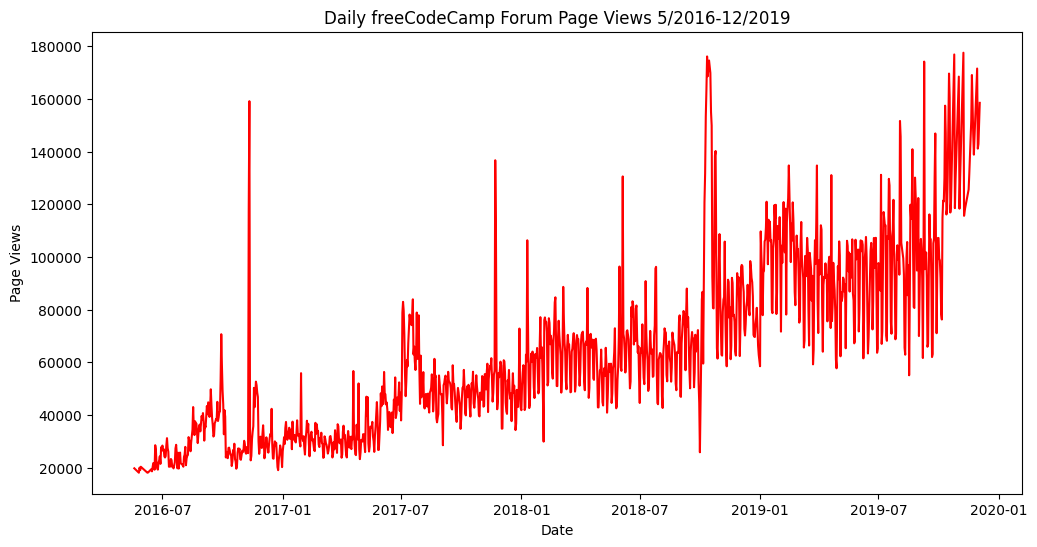

In [31]:
# 3 Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

def draw_line_plot(data) :

  # Plotting the data
  plt.figure(figsize=(12,6))
  plt.plot(clean_df.index, clean_df['value'], color='red', linestyle='-')
  plt.xlabel('Date')
  plt.ylabel('Page Views')
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


draw_line_plot(clean_df)






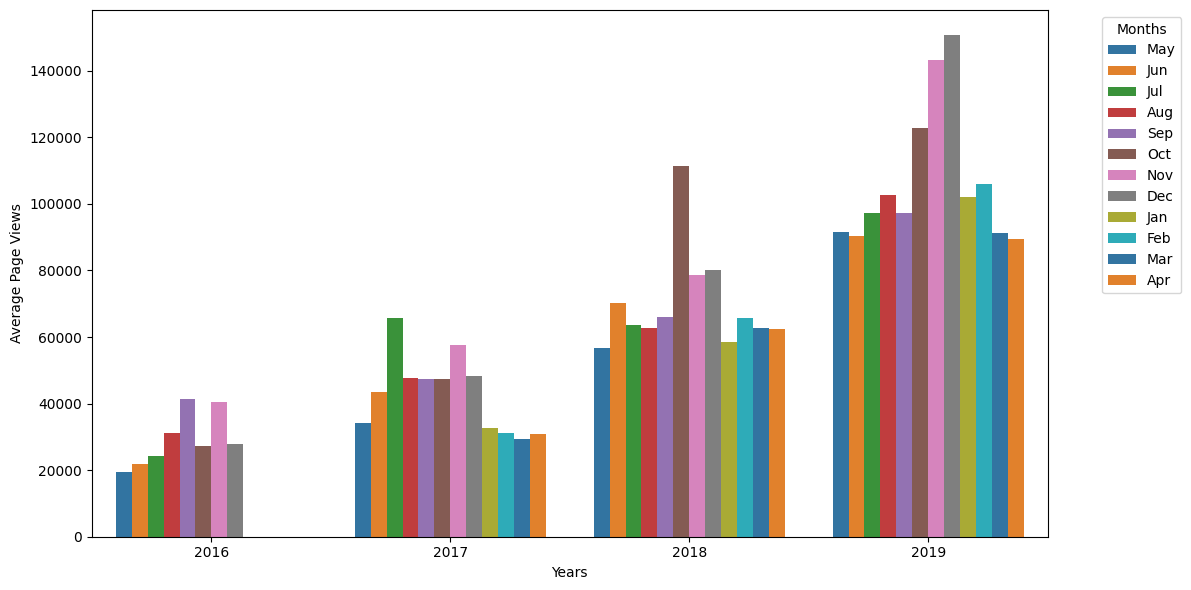

In [105]:
# 4 Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
# It should show average daily page views for each month grouped by year.
# The legend should show month labels and have a title of Months.
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

def draw_bar_plot(df):

  # Convert date values to dateformat and set it as index
  df.index = pd.to_datetime(df.index)

  # Creating a copy of the DataFrame
  df = df.copy()

  # Adding columns with year and month info
  df.loc[:, 'Year'] = df.index.year
  df.loc[:, 'Month'] = df.index.month

  # Group by year and month to calculate average monthly value
  monthly_average = df.groupby(['Year', 'Month'])['value'].mean().reset_index()

  # Converting month numbers to month name abbreviations
  monthly_average['Month'] = monthly_average['Month'].apply(lambda x: calendar.month_abbr[x])

  # Sorting the data by Year and Month (numeric order)
  monthly_average['Month_Num'] = monthly_average['Month'].apply(lambda x: list(calendar.month_abbr).index(x))
  monthly_average = monthly_average.sort_values(by=['Year', 'Month_Num'])

  plt.figure(figsize=(12,6))
  sns.barplot(data=monthly_average, x='Year', y='value', hue='Month', palette='tab10')
  plt.xlabel('Years')
  plt.ylabel('Average Page Views')
  plt.legend(title='Months', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()

draw_bar_plot(clean_df)



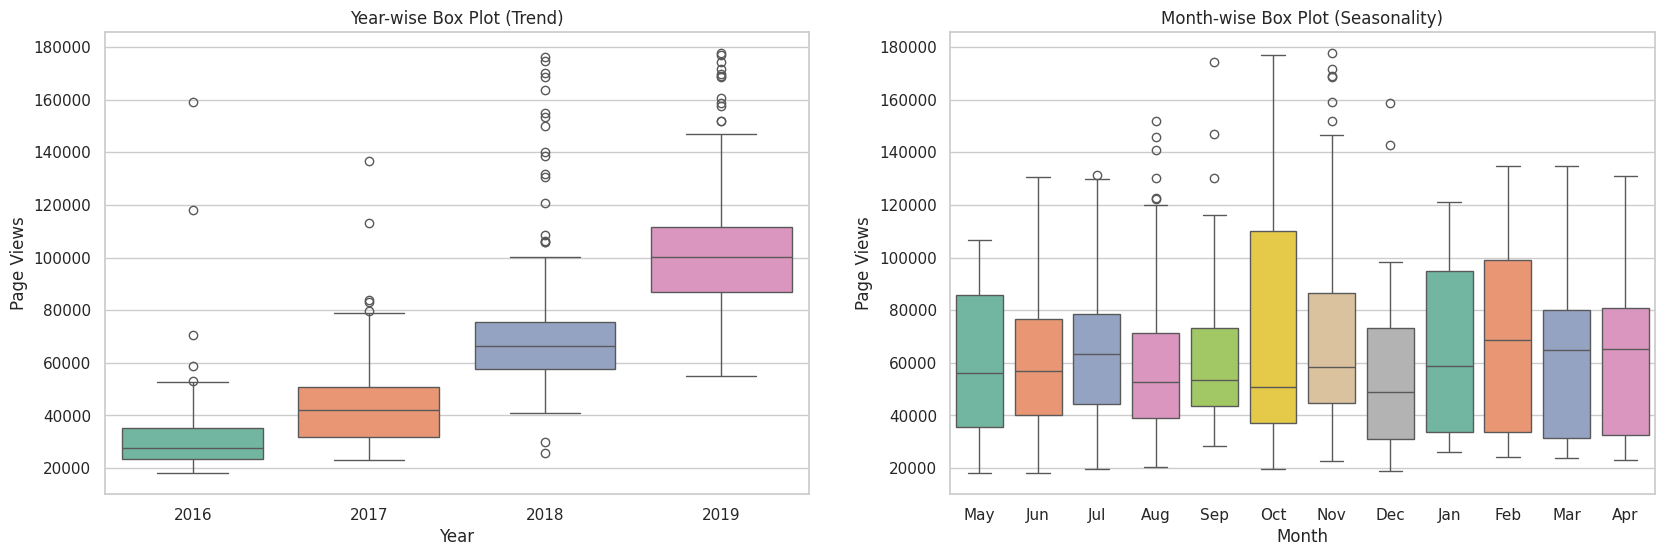

In [129]:
# 5 Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
# These box plots should show how the values are distributed within a given year or month and how it compares over time.
# The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality).
# Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.

def draw_box_plot(df) :

  # Creating a copy of the DataFrame
  df = df.copy()

  # Convert date values to dateformat and set it as index
  df.index = pd.to_datetime(df.index)

  # Adding columns with year and month info
  df.loc[:, 'Year'] = df.index.year
  df.loc[:, 'Month'] = df.index.month

  df.reset_index(inplace=True)

  df['year'] = [d.year for d in df.date]
  df['month'] =  df['Month'].apply(lambda x: calendar.month_abbr[x])

  # Create box plot
  fig, ax = plt.subplots(1,2,figsize=(20,6))

  sns.boxplot(x=df['year'], y=df['value'], ax=ax[0], palette='Set2', legend=False, hue=df['year'])
  ax[0].set_title('Year-wise Box Plot (Trend)')
  ax[0].set_xlabel('Year')
  ax[0].set_ylabel('Page Views')

  sns.boxplot(x=df["month"], y=df["value"], ax=ax[1], palette='Set2', legend=False, hue=df['month'])
  ax[1].set_title('Month-wise Box Plot (Seasonality)')
  ax[1].set_xlabel('Month')
  ax[1].set_ylabel('Page Views')

  plt.show()

draw_box_plot(clean_df)
